In [1]:
import time
start=time.time()
import pandas as pd 

origin_path = '../pickles/deepglobe_val.pickle'

df = pd.read_pickle(origin_path)
print("time : ", time.time() - start)


time :  35.340354442596436


In [2]:
import numpy as np
def clr2id(clr):
    return clr[0]+clr[1]*255+clr[2]*255*255
#transform to uint8 integer label
def transform(label, dtype=np.int32):
    clr_tab = {}
    clr_tab['urban_land'] = [0, 255, 255]
    clr_tab['agriculture'] = [255, 255, 0]
    clr_tab['rangeland'] = [255, 0, 255]
    clr_tab['forest_land'] = [0, 255, 0]
    clr_tab['water'] = [0, 0, 255]
    clr_tab['barren_land'] = [255, 255, 255]
    clr_tab['unknown'] = [0, 0, 0]
    height,width = label.shape[:2]
    # default value is index of clutter.
    newLabel = np.zeros((height, width), dtype=dtype)
    id_label = label.astype(np.int64)
    id_label = id_label[:,:,0]+id_label[:,:,1]*255+id_label[:,:,2]*255*255
    id_tab = {}
    for k, v in clr_tab.items():
        id_tab[k] = clr2id(v)
    
    for tid,key in enumerate(clr_tab.keys()):
        val = id_tab[key]
        mask = (id_label == val)
        newLabel[mask] = tid
    return newLabel

In [3]:
print(df.columns)

Index(['id', 'superpixel_segment', 'G', 'feature', 'edges', 'label_gt',
       'superpixel_num'],
      dtype='object')


In [4]:
#https://stackoverflow.com/questions/56650201/how-to-convert-35-classes-of-cityscapes-dataset-to-19-classes
import numpy
label_list = []
s_num_list = []    
for idx, row in df.iterrows():
    s_num = row['superpixel_segment']
    _, count = np.unique(s_num, return_counts=True)
    s_num_list.append(count)
    for label in row['label_gt']: # for uav
        label_list.append(label)
    # for label in row['transformed_label']: # for citysacpe
    #     label_list.append(label)

In [5]:
set_label = set(label_list)
set_label

{0, 1, 2, 3, 4, 5, 6}

In [6]:
df['id'][0]

'../data/deepglobe/val/902350_sat.jpg'

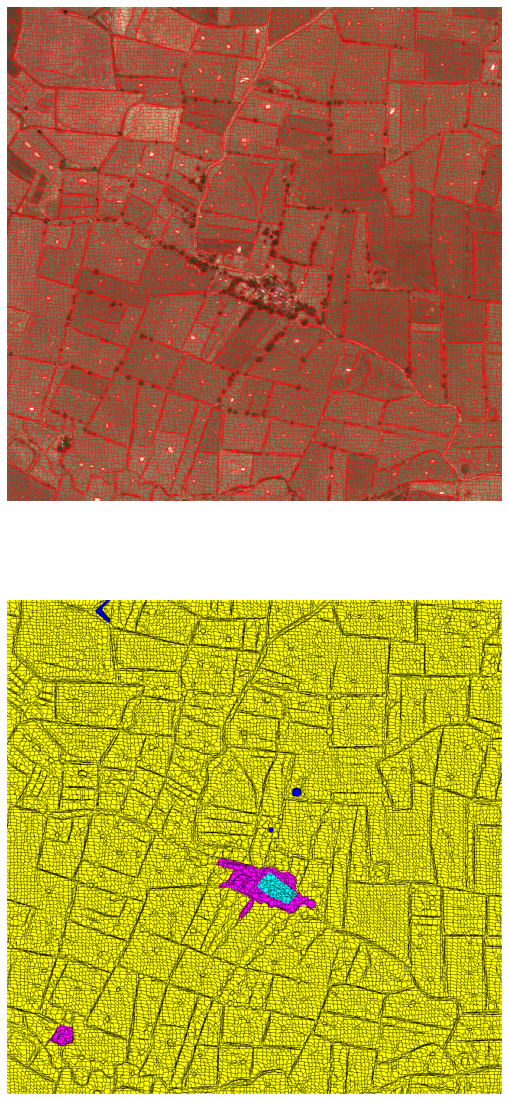

In [7]:
import matplotlib.pyplot as plt
import os
import os
import glob
import numpy as np
from skimage.segmentation import slic, mark_boundaries
from skimage.io import imread
import networkx as nx

fig = plt.figure(figsize=(40,20))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# ax1 = fig.add_subplot(2, 2, 1)
# ax2 = fig.add_subplot(2, 2, 2)
# ax3 = fig.add_subplot(2, 2, 3)
# ax4 = fig.add_subplot(2, 2, 4)

idx = 5
image_path = df['id'][idx]

gt_path = image_path.replace("sat.jpg",'mask.png')
image = imread(image_path)
gt = imread(gt_path)

segments = df['superpixel_segment'][idx]
                
ax1.imshow(mark_boundaries(image, segments,mode = 'thick',color =(1,0,0)))
ax2.imshow(mark_boundaries(gt, segments,mode = 'thick',color =(0,0,0)))
# ax.imshow(image)#, cmap="gray")
ax1.axis("off")
ax2.axis('off')

# Just Graph
G = df['G'][idx]
pos_list = df['feature'][idx][:,:3]
# print(pos_list)
# edges = df['edges'][idx]
# G2 = nx.Graph()

# nx.draw_networkx_edges(G2, pos= pos_list, edgelist=edges ,edge_cmap=plt.cm.autumn, width=0.2, ax=ax3)
# nx.draw_networkx_nodes(G,  pos= pos_list,node_size=0.7 , node_color='r',ax=ax3)
# ax3.invert_yaxis()

# # # Labeled Graph
# try : 
#     label_list_gt =  df['transformed_label'][idx]
# except : 
#     label_list_gt =  df['label_gt'][idx]
# color_map = []
# # # Labeled Graph
# # label_list_gt =  df_drop['label_gt'][idx]
# color_map = []
# for label in label_list_gt :
#     if label == 0 :
#         color_map.append('black') #ok
#     elif label == 1 :
#         color_map.append('red') #ok
#     elif label == 2 :
#         color_map.append('gray')
#     elif label == 3 :
#         color_map.append('#C933C9') 
#     elif label == 4 :
#         color_map.append('green') #ok
#     elif label == 5 :
#         color_map.append('yellow') #ok
#     elif label == 6 :
#         color_map.append('blue')
#     elif label == 7 :
#         color_map.append('purple')
#     elif label == 8 :
#         color_map.append('purple')
#     elif label == 9 :
#         color_map.append('purple')
#     elif label == 10 :
#         color_map.append('purple')
#     elif label == 11 :
#         color_map.append('purple')
#     elif label == 12 :
#         color_map.append('purple')
#     elif label == 13 :
#         color_map.append('purple')
#     elif label == 14 :
#         color_map.append('purple')
#     elif label == 15 :
#         color_map.append('purple')
#     elif label == 16 :
#         color_map.append('purple')
#     elif label == 17 :
#         color_map.append('purple')
#     elif label == 18 :
#         color_map.append('purple')
#     elif label == 19 :
#         color_map.append('purple')

        
# print(len(color_map))

# nx.draw_networkx_edges(G2, pos= pos_list, edgelist=edges ,edge_cmap=plt.cm.autumn, width=0.2, ax=ax4)
# nx.draw_networkx_nodes(G,  pos= pos_list, node_size=20, node_color=color_map, ax=ax4)
# ax4.invert_yaxis()
plt.show()

In [8]:
segments

array([[    0,     0,     0, ...,   147,   147,   147],
       [    0,     0,     0, ...,   147,   147,   147],
       [    0,     0,     0, ...,   147,   147,   147],
       ...,
       [23840, 23840, 23840, ..., 23803, 23803, 23803],
       [23840, 23840, 23840, ..., 23803, 23803, 23803],
       [23840, 23840, 23840, ..., 23803, 23803, 23803]])

In [26]:
import os
import pandas as pd
import glob
import numpy as np
from skimage.segmentation import slic, mark_boundaries
from tqdm import tqdm
import argparse
import networkx as nx
import os
from dgl.data.utils import save_graphs
from dgl.data.utils import load_graphs
import dgl
import os
import sys

sys.path.append(os.path.abspath('../preprocessing/superpixels/superpixel_fcn'))
import torch.backends.cudnn as cudnn
import models
import torchvision.transforms as transforms
import flow_transforms
from skimage.io import imread, imsave
from loss import *
import time
import random
import matplotlib.pyplot as plt



os.environ['CUDA_VISIBLE_DEVICES']='0'


downsize = 128
@torch.no_grad()
def test(img, model):
      # Data loading code
    
    input_transform = transforms.Compose([
        flow_transforms.ArrayToTensor(),
        transforms.Normalize(mean=[0,0,0], std=[255,255,255]),
        transforms.Normalize(mean=[0.411,0.432,0.45], std=[1,1,1])
    ])

#     img_file = img_paths[idx]
#     load_path = img_file
#     imgId = os.path.basename(img_file)[:-4]

#     # may get 4 channel (alpha channel) for some format
#     img_ = imread(load_path)[:, :, :3]
    img_ = img
    H, W, _ = img_.shape
    H_, W_  = int(np.ceil(H/16.)*16), int(np.ceil(W/16.)*16)

    # get spixel id
    n_spixl_h = int(np.floor(H_ / downsize))
    n_spixl_w = int(np.floor(W_ / downsize))

    spix_values = np.int32(np.arange(0, n_spixl_w * n_spixl_h).reshape((n_spixl_h, n_spixl_w)))
    spix_idx_tensor_ = shift9pos(spix_values)

    spix_idx_tensor = np.repeat(
      np.repeat(spix_idx_tensor_, downsize, axis=1), downsize, axis=2)

    spixeIds = torch.from_numpy(np.tile(spix_idx_tensor, (1, 1, 1, 1))).type(torch.float).cuda()

    n_spixel =  int(n_spixl_h * n_spixl_w)


    img = cv2.resize(img_, (W_, H_), interpolation=cv2.INTER_CUBIC)
    img1 = input_transform(img)
    ori_img = input_transform(img_)

    # # compute output
    # tic = time.time()
    output = model(img1.cuda().unsqueeze(0))
    # toc = time.time() - tic

    # assign the spixel map
    curr_spixl_map = update_spixl_map(spixeIds, output)
    ori_sz_spixel_map = F.interpolate(curr_spixl_map.type(torch.float), size=( H_,W_), mode='nearest').type(torch.int)

    mean_values = torch.tensor([0.411, 0.432, 0.45], dtype=img1.cuda().unsqueeze(0).dtype).view(3, 1, 1)
    spixel_viz, spixel_label_map = get_spixel_image((ori_img + mean_values).clamp(0, 1), ori_sz_spixel_map.squeeze(), n_spixels= n_spixel,  b_enforce_connect=True)

    # ************************ Save all result********************************************
#     # save img, uncomment it if needed
#     if not os.path.isdir(os.path.join(save_path, 'img')):
#         os.makedirs(os.path.join(save_path, 'img'))
#     spixl_save_name = os.path.join(save_path, 'img', imgId + '.jpg')
#     img_save = (ori_img + mean_values).clamp(0, 1)
#     imsave(spixl_save_name, img_save.detach().cpu().numpy().transpose(1, 2, 0))


#     # save spixel viz
#     if not os.path.isdir(os.path.join(save_path, 'spixel_viz')):
#         os.makedirs(os.path.join(save_path, 'spixel_viz'))
#     spixl_save_name = os.path.join(save_path, 'spixel_viz', imgId + '_sPixel.png')
#     imsave(spixl_save_name, spixel_viz.transpose(1, 2, 0))

#     # save the unique maps as csv, uncomment it if needed
#     if not os.path.isdir(os.path.join(save_path, 'map_csv')):
#         os.makedirs(os.path.join(save_path, 'map_csv'))
#     output_path = os.path.join(save_path, 'map_csv', imgId + '.csv')
#       # plus 1 to make it consistent with the toolkit format
#     np.savetxt(output_path, (spixel_label_map + 1).astype(int), fmt='%i',delimiter=",")

    # print('sfcn....end')

    return spixel_label_map


def get_graph_from_segments(image, gt, segments):
    # load the image and convert it to a floating point data type
    # print('graph....start')
    num_nodes = np.max(segments)
    idx,cnt = np.unique(segments,return_counts=True)
    
    nodes = {
        node: {
            "rgb_list": [],
            "pos_list": [],
            "label_list": [],
        } for node in range(num_nodes+1)
    }

    height = image.shape[0]
    width = image.shape[1]
    for y in range(height):
        for x in range(width):
            node = segments[y,x]
            rgb = image[y,x,:]
            label = gt[y,x]
            
            pos = np.array([float(x)/width,float(y)/height])

            nodes[node]["rgb_list"].append(rgb)
            nodes[node]["pos_list"].append(pos)
            nodes[node]["label_list"].append(label)

        #end for
    #end for
    
    G = nx.Graph()
    pos_list = []
    rgb_list = []
    label_list = []

    for node in nodes:
        nodes[node]["rgb_list"] = np.stack(nodes[node]["rgb_list"])
        
        nodes[node]["pos_list"] = np.stack(nodes[node]["pos_list"])
        nodes[node]["label_list"] = np.stack(nodes[node]["label_list"])
        
        # rgb
        rgb_mean = np.mean(nodes[node]["rgb_list"], axis=0)
        
        # Pos
        pos_mean = np.mean(nodes[node]["pos_list"], axis=0)
        
        # label
        uniq, cnts = np.unique(nodes[node]["label_list"],return_counts=True)
        
        # print(cnts.argmax())
        
        label_max = uniq[cnts.argmax()]
        
        
        
        rgb_list.append(rgb_mean)
        pos_list.append(pos_mean)
        label_list.append(label_max)
        features = np.concatenate(
          [
            np.reshape(rgb_mean, -1),
            
            np.reshape(pos_mean, -1),
            
          ]
        )
        G.add_node(node, features = list(features))
    #end
    
    # From https://stackoverflow.com/questions/26237580/skimage-slic-getting-neighbouring-segments
    segments_ids = np.unique(segments)
    segments_ids = torch.from_numpy(segments_ids)
    segments_ids = segments_ids.to(torch.device(device))
    
    segments_torch = torch.from_numpy(segments)
    segments_torch = segments_torch.to(torch.device(device))
    centers = np.array((torch.mean(torch.nonzero(segments_torch==i),axis=1) for i in segments_ids))

    # centers
    # centers = np.array([np.mean(np.nonzero(segments==i),axis=1) for i in segments_ids])

    vs_right = np.vstack([segments[:,:-1].ravel(), segments[:,1:].ravel()])
    vs_below = np.vstack([segments[:-1,:].ravel(), segments[1:,:].ravel()])
    bneighbors = np.unique(np.hstack([vs_right, vs_below]), axis=1)

    # Adjacency loops
    for i in range(bneighbors.shape[1]):
        if bneighbors[0,i] != bneighbors[1,i]:
            G.add_edge(bneighbors[0,i],bneighbors[1,i])
    
    # Self loops
    for node in nodes:
        G.add_edge(node,node)
    
    n = len(G.nodes)
    m = len(G.edges)
    h = np.zeros([n,NUM_FEATURES]).astype(NP_TORCH_FLOAT_DTYPE)
    edges = np.zeros([2*m,2]).astype(NP_TORCH_LONG_DTYPE)
    for e,(s,t) in enumerate(G.edges):
        edges[e,0] = s
        edges[e,1] = t
        
        edges[m+e,0] = t
        edges[m+e,1] = s
    #end for
    for i in G.nodes:
        h[i,:] = G.nodes[i]["features"]
    #end for
    # print('graph....end')
    return G, h, edges, rgb_list, pos_list, label_list

def clr2id(clr):
    return clr[0]+clr[1]*255+clr[2]*255*255
#transform to uint8 integer label
def transform(label, dtype=np.int32):
    clr_tab = {}
    clr_tab['urban_land'] = [0, 255, 255]
    clr_tab['agriculture'] = [255, 255, 0]
    clr_tab['rangeland'] = [255, 0, 255]
    clr_tab['forest_land'] = [0, 255, 0]
    clr_tab['water'] = [0, 0, 255]
    clr_tab['barren_land'] = [255, 255, 255]
    clr_tab['unknown'] = [0, 0, 0]
    height,width = label.shape[:2]
    # default value is index of clutter.
    newLabel = np.zeros((height, width), dtype=dtype)
    id_label = label.astype(np.int64)
    id_label = id_label[:,:,0]+id_label[:,:,1]*255+id_label[:,:,2]*255*255
    id_tab = {}
    for k, v in clr_tab.items():
        id_tab[k] = clr2id(v)
    
    for tid,key in enumerate(clr_tab.keys()):
        val = id_tab[key]
        mask = (id_label == val)
        newLabel[mask] = tid
    return newLabel
phase = 'train'
path = f'../data/deepglobe/{phase}/'
file_list = glob.glob(f'{path}/*.jpg')
pretrained = '../preprocessing/superpixels/superpixel_fcn/pretrain_ckpt/SpixelNet_bsd_ckpt.tar'
os.environ['CUDA_VISIBLE_DEVICES'] = '3'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
 # create model
network_data = torch.load(pretrained)
print("=> using pre-trained model '{}'".format(network_data['arch']))

print(f"Phase : {phase}")
model = models.__dict__[network_data['arch']]( data = network_data).cuda()
model.eval()
# args.arch = network_data['arch']
cudnn.benchmark = True

        
segments = test(image, model)
        



=> using pre-trained model 'SpixelNet1l_bn'
Phase : train


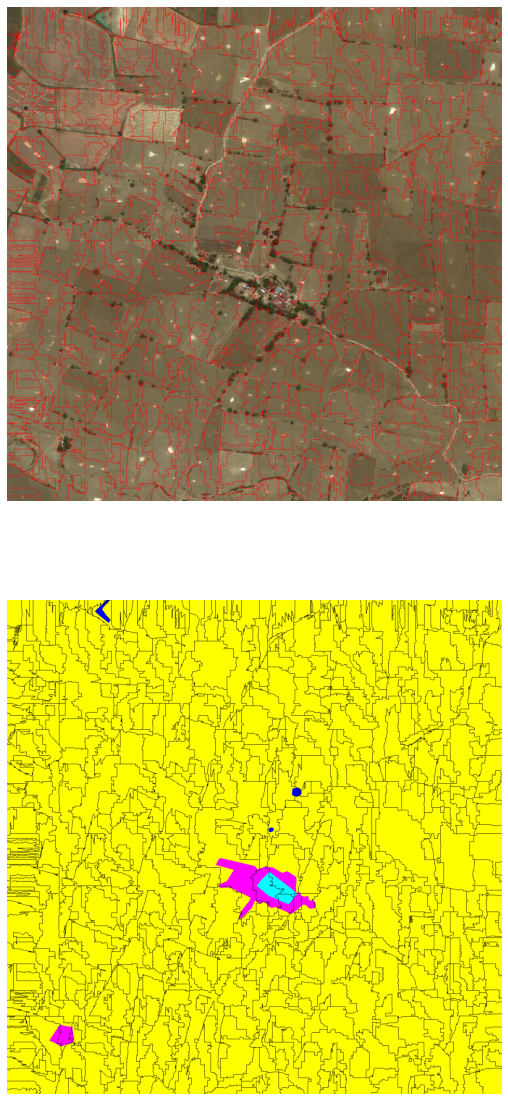

In [27]:
import matplotlib.pyplot as plt
import os
import os
import glob
import numpy as np
from skimage.segmentation import slic, mark_boundaries
from skimage.io import imread
import networkx as nx

fig = plt.figure(figsize=(40,20))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

                
ax1.imshow(mark_boundaries(image, segments,mode = 'thick',color =(1,0,0)))
ax2.imshow(mark_boundaries(gt, segments,mode = 'thick',color =(0,0,0)))

ax1.axis("off")
ax2.axis('off')

plt.show()

In [28]:
segments

array([[  0,   0,   0, ...,  54,  54,  54],
       [  0,   0,   0, ...,  54,  54,  54],
       [  0,   0,   0, ...,  54,  54,  54],
       ...,
       [695, 695, 695, ..., 670, 670, 670],
       [695, 695, 695, ..., 670, 670, 670],
       [695, 695, 695, ..., 670, 670, 670]])